<a href="https://colab.research.google.com/github/anaguilarar/Pillars_PNuT/blob/main/root_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from google.colab import files
from IPython.display import Image
from PIL import Image as Img
import numpy as np
import io

if not os.path.exists("/content/Pillars_PNuT") and not os.getcwd().endswith("/content/Pillars_PNuT"):
    !git clone https://github.com/anaguilarar/Pillars_PNuT.git
    print("Cloned")
    
else:
    print("Pillars_PNuT directory already exists")

if not os.getcwd().endswith("/content/Pillars_PNuT"):
  os.chdir("/content/Pillars_PNuT")

### folder that will contain the imagery
imagery_path = "/content/"


Cloning into 'Pillars_PNuT'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 30 (delta 9), reused 23 (delta 5), pack-reused 0
Unpacking objects: 100% (30/30), 87.06 KiB | 724.00 KiB/s, done.
Cloned


### Images uploading

To use this algorithm is necessary first to upload the pillar images. 
- one option is to drag all your images to the left panel that appears after clicking on the folder symbol. 
- or you can use the following cell to upload your images from your local storage.


In [2]:

images = files.upload()

for i in range(len(images)):
  m = Image(list(images.keys())[i])
  image = Img.open(io.BytesIO(m.data)).save(os.path.join(imagery_path,list(images.keys())[i]))


Saving col-0-line36--p1_jpg.rf.92f52730249dd4d116dcf16a66a6dd5d.jpg to col-0-line36--p1_jpg.rf.92f52730249dd4d116dcf16a66a6dd5d.jpg
Saving line33-p1_jpg.rf.c4582454337740d844a0c30b6ca0342d.jpg to line33-p1_jpg.rf.c4582454337740d844a0c30b6ca0342d.jpg
Saving line33-p2_jpg.rf.609317ad29d481a7bf347d7bbee076da.jpg to line33-p2_jpg.rf.609317ad29d481a7bf347d7bbee076da.jpg
Saving line48-p1_jpg.rf.603e2b2f382698bc500b703045df76eb.jpg to line48-p1_jpg.rf.603e2b2f382698bc500b703045df76eb.jpg
Saving line48-p3_jpg.rf.cbbb77ad0a0b09fee06cdf365deb2374.jpg to line48-p3_jpg.rf.cbbb77ad0a0b09fee06cdf365deb2374.jpg
Saving line49-p1_jpg.rf.ebe41c31109d194bccb96e156a2c1ec3.jpg to line49-p1_jpg.rf.ebe41c31109d194bccb96e156a2c1ec3.jpg


### Model setting

Once the imagery was uploaded, the next step is to set the root and pillar detector. In order to do that we will use a function named as RootandPillars, this function will first find the root using a segmentation model based on convolutional neural networks. Then the pillars are detected as circles using the [Hough transform](https://docs.opencv.org/4.x/da/d53/tutorial_py_houghcircles.html).

In [4]:
from root_distance.rootdetector_fun import RootandPillars

wp  = "https://dlmodels-bucket.s3.ap-northeast-1.amazonaws.com/root_detection.zip"
rootdetector = RootandPillars(imagery_path, ## folder that contain images 
                              wp ## CNN model's weight
                              )


58889256/58889256 [==============================] - 0s 0us/step
checkpoint load models/root_detection/vgg16_root_detection
1/1 [==============================] - 27s 27s/step
16 circles were found
16 circles were found
17 circles were found
16 circles were found
17 circles were found
16 circles were found


-4.0
13.5
20.5
19.5
205.0
20.5
-4.0
13.5
20.5
19.5
205.0
20.5
-4.0
13.5
20.5
19.5
205.0
20.5
-4.0
13.5
20.5
19.5
205.0
20.5
-4.0
13.5
20.5
19.5
205.0
20.5
-4.0
13.5
20.5
19.5
205.0
20.5


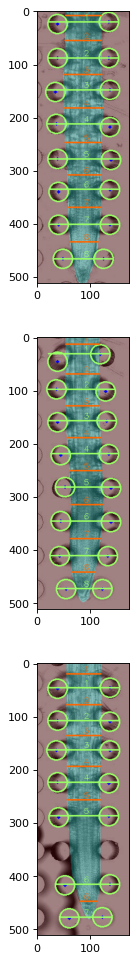

In [7]:
f = rootdetector.plot_final_layer(pillars_color=(153, 255, 102), maximages = 3, figsize = (8,15))

### Exporting images and tables

In [5]:
rootdetector.lines_table_as_csv("test.csv")
rootdetector.export_final_images('/content/overlaped_images/')


In [ ]:
rootdetector.root_lines_as_table

,index,line_index,distances_pixels,distances_microns,corrected_factor,object,image_name
0,0,1,62.0,154.113845,-52.943077,root,line74-p4_jpg.rf.093f1363e861e6e9c9c059feee206...
1,1,2,58.0,144.171017,-57.914492,root,line74-p4_jpg.rf.093f1363e861e6e9c9c059feee206...
2,2,3,55.0,136.713895,-61.643052,root,line74-p4_jpg.rf.093f1363e861e6e9c9c059feee206...
3,3,4,55.0,136.713895,-61.643052,root,line74-p4_jpg.rf.093f1363e861e6e9c9c059feee206...
4,4,5,52.0,129.256774,-65.371613,root,line74-p4_jpg.rf.093f1363e861e6e9c9c059feee206...
...,...,...,...,...,...,...,...
88,0,1,46.0,114.342530,-72.828735,root,line55-p2_jpg.rf.2702fc951f0990ff0755efd6831cf...
89,1,2,46.0,114.342530,-72.828735,root,line55-p2_jpg.rf.2702fc951f0990ff0755efd6831cf...
90,2,3,46.0,114.342530,-72.828735,root,line55-p2_jpg.rf.2702fc951f0990ff0755efd6831cf...
91,3,4,46.0,114.342530,-72.828735,root,line55-p2_jpg.rf.2702fc951f0990ff0755efd6831cf...
